# Comparison of lattice tracking between Xsuit and PysixTrack

This script compares the lattice position of any particle within the same beam tracked by the two different scripts.

- The first script is the stable version of the sis100 simulation based on pySixTrack and PyHEADTAIL

- The second one isn a new simulation based on the new library Xsuite

For this comparison, the effects of space charge interactions have not been considered in order to simplify the problem. These will be dealt with in a separate script.

The objective of this script is to analyze if both codes give the same results for the same ltice and particle configuration and to observe if there is any significant difference between them.

__Libraries web sites__

- _Xsuite_ : https://github.com/xsuite 
- _pyHEADTAIL_ : https://github.com/PyCOMPLETE/PyHEADTAIL
- _pySixTrack_ : https://github.com/SixTrack/pysixtrack/tree/master/pysixtrack



This file is part of one of the projects developed in the international summer student program at GSI-FAIR 2022.

# 0. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Intial partices
### 1.1 Loading the  initial particles from the scripts

In [2]:
#pht_particles=np.load('./SixTrackLib_PyHEADTAIL_first_contact/data_stl.npy')
pht_particles=np.load('data_stl.npy')


o_pht=pht_particles[0] # 0-x, 1-px, 2-y, 3-py, 4-z, 5-dp
n_pht=pht_particles[1] # 0-x, 1-px, 2-y, 3-py, 4-z, 5-dp

In [3]:
xsuit_particles=np.load('data_xsuit.npy')

o_xsuit=xsuit_particles[0] # 0-x, 1-px, 2-y, 3-py, 4-z, 5-dp
n_xsuit=xsuit_particles[1] # 0-x, 1-px, 2-y, 3-py, 4-z, 5-dp

### 1. 2 Comprobation of the initial beam
Checking that both programs have the same itial beam

In [4]:
def printer(lst):
    print('The mean is -->',np.mean(lst))
    print('the std is-->',np.std(lst))

- Checking if both bunches have the same mean and std. deviation

In [5]:
printer(o_xsuit[0])
printer(o_pht[0])

The mean is --> 2.42861286636753e-19
the std is--> 0.012341112004396053
The mean is --> 2.42861286636753e-19
the std is--> 0.012341112004396053


- Checking if the elements are equal one to one between vectors

In [6]:
printer(o_pht[0]-o_xsuit[0])
printer(o_pht[1]-o_xsuit[1])
printer(o_pht[2]-o_xsuit[2])
printer(o_pht[3]-o_xsuit[3])
printer(o_pht[4]-o_xsuit[4])
printer(o_pht[5]-o_xsuit[5])

The mean is --> 0.0
the std is--> 0.0
The mean is --> 0.0
the std is--> 0.0
The mean is --> 0.0
the std is--> 0.0
The mean is --> 0.0
the std is--> 0.0
The mean is --> 0.0
the std is--> 0.0
The mean is --> 0.0
the std is--> 0.0


## 2.  Lattice comparation

### 2.1  Loading the  the particles behaibour in the lattice behavior from both scripts

In [7]:
stl_lattice=np.load('lattice_data_stl.npy')

In [8]:
xsuit_lattice=np.load('lattice_xsuit.npy')

### 2.2 Plotting both lattice
This is how the evolution of the x-position along the lattice looks like in both scripts.

Apparently they are the same but we will check it below in detail since even a small error in one lap can be a huge error for high number of laps simulations. Ideally we would like to have an error less than the precision of the machine used (1e-16)


Text(0.5, 1.0, 'Stl lattice')

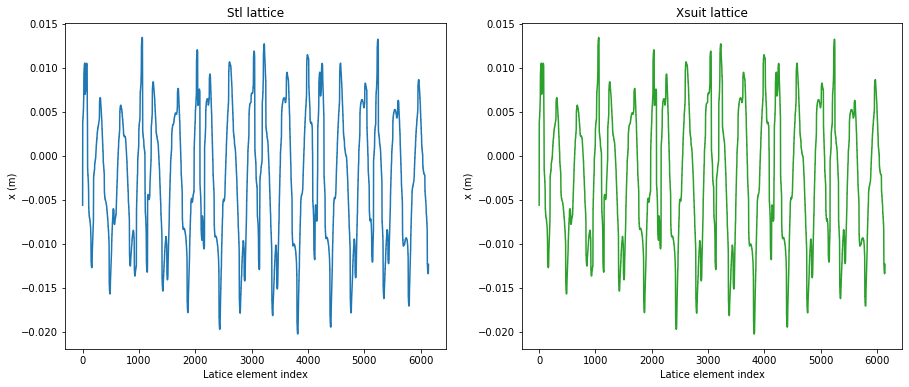

In [9]:
fig = plt.figure(figsize=(15,6))


ax = fig.subplots(1,2)

ax[1].plot(xsuit_lattice,'tab:green')
ax[1].set_xlabel('Latice element index')
ax[1].set_ylabel('x (m)')
ax[1].set_title('Xsuit lattice')

ax[0].plot(stl_lattice, 'tab:blue')
ax[0].set_xlabel('Latice element index')
ax[0].set_ylabel('x (m)')
ax[0].set_title('Stl lattice')

- Checking that the two latices have the same number of elements

In [10]:
len(stl_lattice) == len(xsuit_lattice)

True

### 2.3  Plot the diferrence between lattices

Looking at the plot we can clonclude that the diferrence between latices is sufficiently insignificant to consider them completely equal.

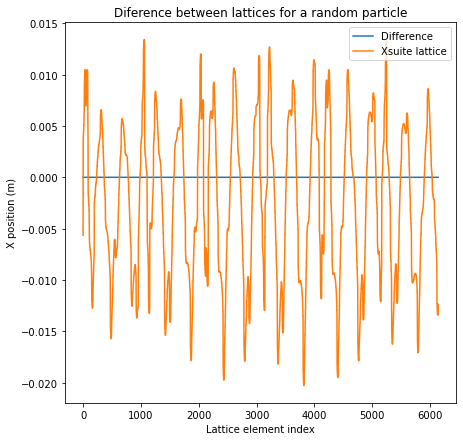

In [11]:
dif=(stl_lattice[0:6141]-xsuit_lattice[0:6141])**2/stl_lattice.max()**2
plt.figure(figsize=(7,7))
plt.plot(dif, label='Difference')
plt.plot(xsuit_lattice, label='Xsuite lattice')
plt.ylabel('X position (m)')
plt.xlabel('Lattice element index')
plt.title('Diference between lattices for a random particle')
plt.legend(loc = "upper right")

### 2. 4 Zooming inside the diference plot
We can se that exist a little diference between scripts but it is many orders of magnitud smaller than the machine precision what means that it is not significant

Text(0.5, 1.0, 'Diference between lattices')

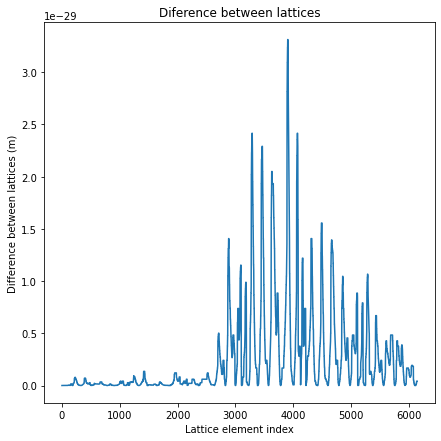

In [12]:
dif=(stl_lattice[0:6141]-xsuit_lattice[0:6141])**2/stl_lattice.max()**2
plt.figure(figsize=(7,7))
plt.plot(dif)
plt.ylabel('Difference between lattices (m)')
plt.xlabel('Lattice element index')
plt.title('Diference between lattices')

Text(0.5, 1.0, 'Diference focused on the peack')

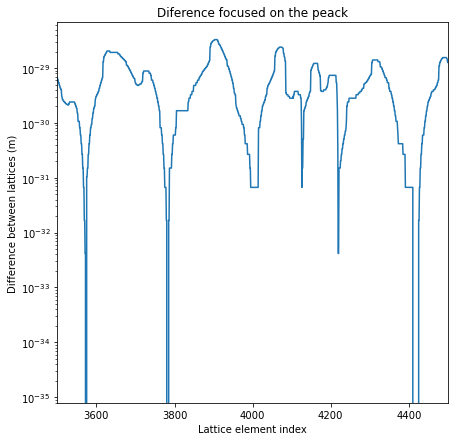

In [13]:
plt.figure(figsize=(7,7))
plt.plot(dif)
plt.xlim(left=3500, right=4500)
plt.yscale('log')

plt.ylabel('Difference between lattices (m)')
plt.xlabel('Lattice element index')
plt.title('Diference focused on the peack')

### 2.5 The maximun difference:

We can conclude that the difference between scripts is negligible so that both can be considered the same in terms of tracking. 

In [14]:
dif.max()

3.311967057121742e-29